**#Step 1: Import Libraries**

---



We import the necessary libraries for data manipulation, visualization, and modeling.

In [7]:
#importing libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import xgboost as xgb
from sklearn.metrics import mean_squared_error, mean_absolute_error

#**Step 2: Define MAPE Calculation Function**


---


A function to calculate the Mean Absolute Percentage Error (MAPE) is defined.



In [8]:
# Function to calculate Mean Absolute Percentage Error (MAPE)
def mean_absolute_percentage_error(y_true, y_pred):
    """Calculate MAPE given by y_true and y_pred"""
    y_true, y_pred = np.array(y_true), np.array(y_pred)
    return np.mean(np.abs((y_true - y_pred) / y_true)) * 100

**#Step 3: Define Function to Process Data for Each Class**


---


A function that processes data for each class, trains an XGBoost model, makes predictions, evaluates the model, and forecasts future values.

In [9]:
# Function to process data for each class
def process_class_data(df, class_name, split_date='2021-06-09', future_start='2024-01-01', future_end='2028-12-31'):
    # Filter data for the specific class and drop the 'class' column
    df_class = df[df['class'] == class_name].drop(columns='class')

    # Prepare the data for XGBoost
    df_class['DATE'] = pd.to_datetime(df_class['DATE'], dayfirst=True)
    df_class['year'] = df_class['DATE'].dt.year
    df_class['month'] = df_class['DATE'].dt.month
    df_class['day'] = df_class['DATE'].dt.day
    df_class.set_index('DATE', inplace=True)

    # Define features and target
    features = ['year', 'month', 'day']
    target = 'Amount'
    X = df_class[features]
    y = df_class[target]

    # Split the data into training and test sets
    X_train = X[X.index <= split_date]
    X_test = X[X.index > split_date]
    y_train = y[y.index <= split_date]
    y_test = y[y.index > split_date]

    # Train the XGBoost model
    xgb_model = xgb.XGBRegressor(objective='reg:squarederror', n_estimators=1000)
    xgb_model.fit(X_train, y_train)

    # Make predictions
    y_pred = xgb_model.predict(X_test)

    # Evaluate the model
    rmse = np.sqrt(mean_squared_error(y_test, y_pred))
    mae = mean_absolute_error(y_test, y_pred)
    mape = mean_absolute_percentage_error(y_test, y_pred)

    # Print evaluation metrics
    print(f'Class: {class_name}')
    print(f'XGBoost RMSE: {rmse}')
    print(f'XGBoost MAE: {mae}')
    print(f'XGBoost MAPE: {mape}')

    # Plot actual vs predicted values
    fig, ax = plt.subplots(figsize=(12, 5))
    ax.scatter(y_test.index, y_test, color='r', label='Actual')
    ax.plot(y_test.index, y_pred, color='b', label='Forecast')
    ax.set_title(f'XGBoost Forecast vs Actual for Class {class_name}')
    ax.legend()
    plt.show()

    # Extend the forecast for the next 5 years using XGBoost
    future_dates = pd.date_range(start=future_start, end=future_end)
    future_df = pd.DataFrame({'DATE': future_dates})
    future_df['year'] = future_df['DATE'].dt.year
    future_df['month'] = future_df['DATE'].dt.month
    future_df['day'] = future_df['DATE'].dt.day

    future_X = future_df[features]
    future_predictions = xgb_model.predict(future_X)

    # Plot the extended forecast
    fig, ax = plt.subplots(figsize=(12, 5))
    ax.plot(future_dates, future_predictions, color='b', label='Forecast')
    ax.set_title(f'XGBoost Forecast for the Next 5 Years (2024-2028) for Class {class_name}')
    ax.legend()
    plt.show()

    # Display the forecasted values for the last few months of the forecast period
    future_df['Amount'] = future_predictions
    display(future_df.tail())


#**Step 4: Load Data and Drop Unnecessary Columns**

---



The dataset is loaded, and unnecessary columns are dropped to clean the data.

In [10]:
# Load the data
data = pd.read_csv('modified_working_data.csv')

# Drop unnecessary columns
to_drop = ['SubCounty', 'LogAmount', 'frequency', 'Year', 'PermitNo', 'ServiceHeaderID', 'pin', 'CustomerName', 'ServiceName', 'IssuedBy', 'BusinessActivity', 'Service Code', 'Ward', 'PhysicalLocation', 'DayOfWeek', 'Month', 'Column1']
data.drop(to_drop, inplace=True, axis=1)

#**Step 5: Group Data by Class and Process Each Group**

---



The dataset is grouped by the "class" column, and the process_class_data function is called for each group.

Class: medium
XGBoost RMSE: 1295.9977505290506
XGBoost MAE: 815.9130020027012
XGBoost MAPE: 8.244748643072475


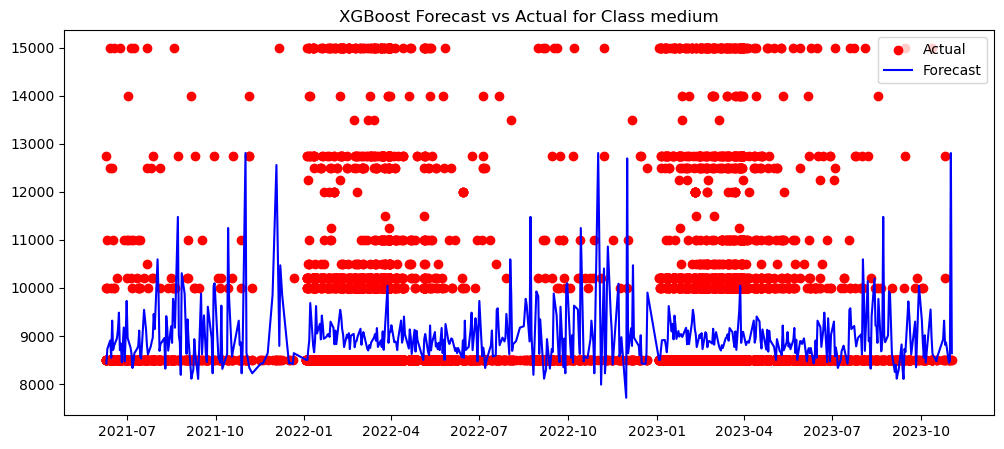

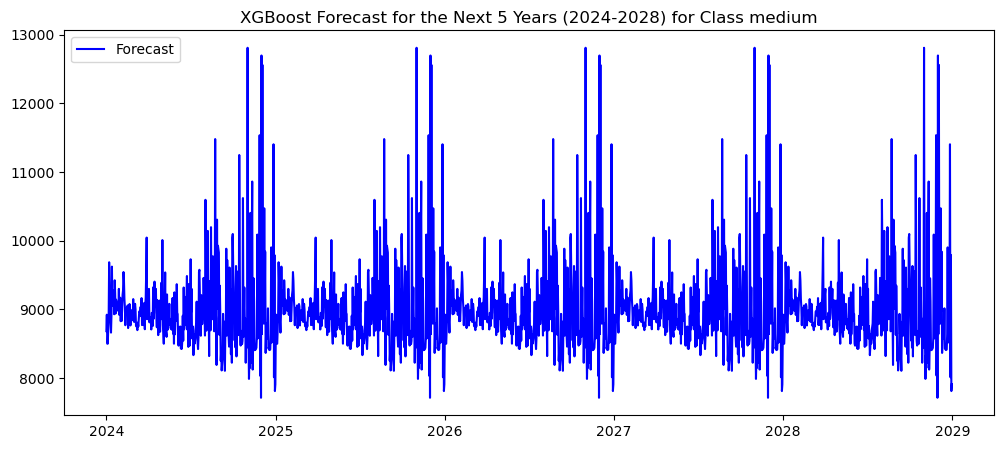

,DATE,year,month,day,Amount
1822,2028-12-27,2028,12,27,11403.486328
1823,2028-12-28,2028,12,28,8012.262207
1824,2028-12-29,2028,12,29,9792.121094
1825,2028-12-30,2028,12,30,7810.932617
1826,2028-12-31,2028,12,31,7910.525391


Class: micro
XGBoost RMSE: 780.7479055311212
XGBoost MAE: 654.598878165785
XGBoost MAPE: 23.137476638456715


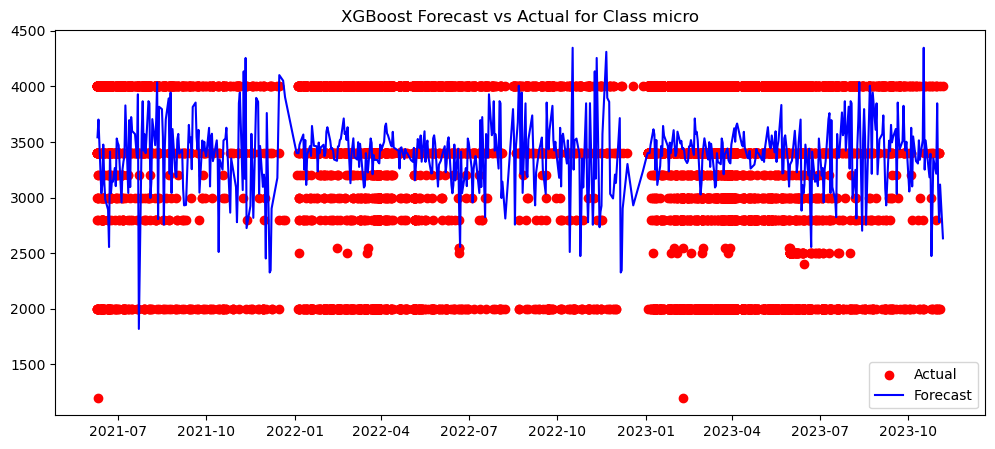

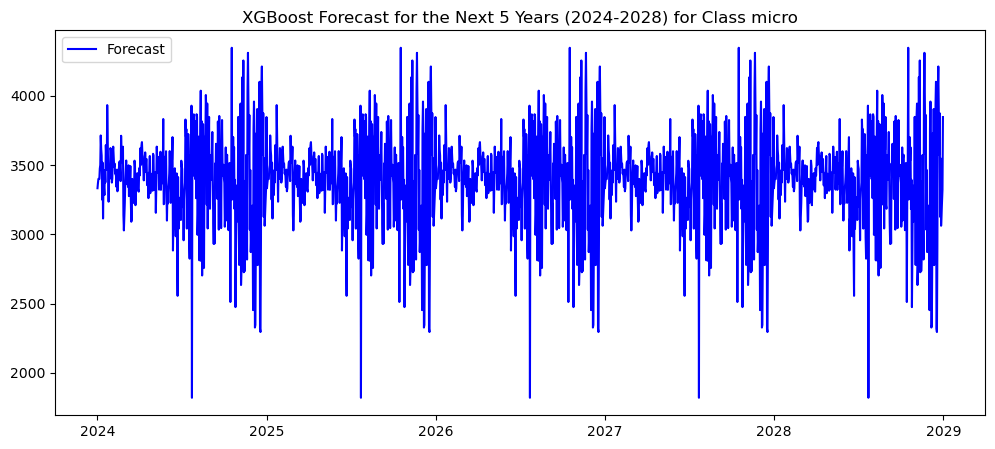

,DATE,year,month,day,Amount
1822,2028-12-27,2028,12,27,3062.086426
1823,2028-12-28,2028,12,28,3159.464844
1824,2028-12-29,2028,12,29,3236.750000
1825,2028-12-30,2028,12,30,3322.008545
1826,2028-12-31,2028,12,31,3847.127441


Class: other
XGBoost RMSE: 18294.63412584662
XGBoost MAE: 12814.461809809429
XGBoost MAPE: 44.1670184629307


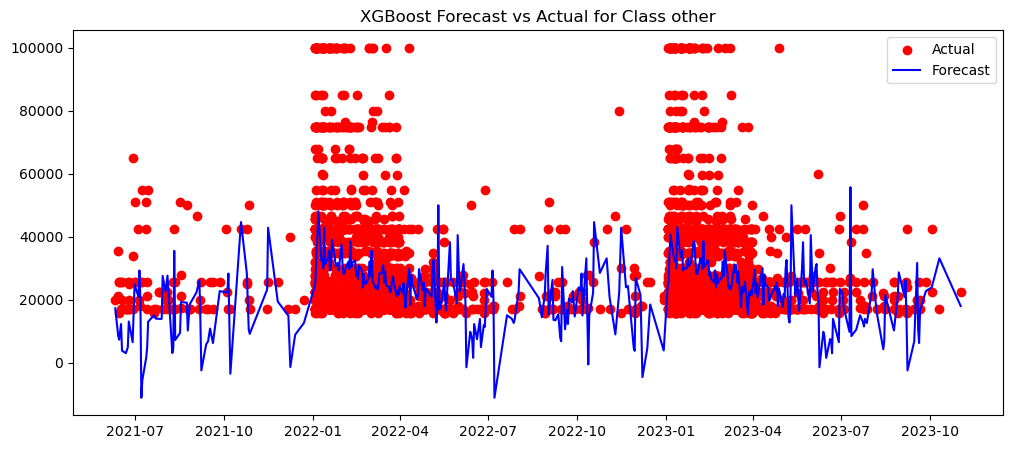

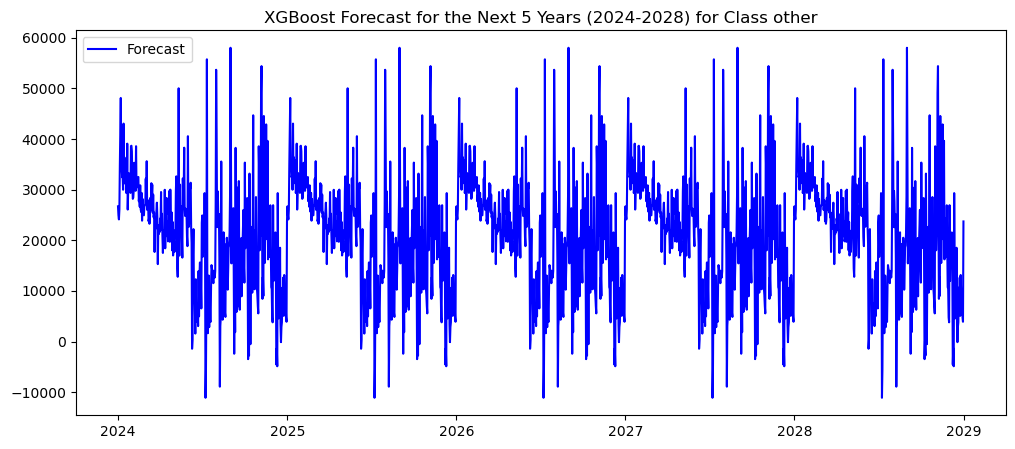

,DATE,year,month,day,Amount
1822,2028-12-27,2028,12,27,9671.923828
1823,2028-12-28,2028,12,28,8226.900391
1824,2028-12-29,2028,12,29,4874.236328
1825,2028-12-30,2028,12,30,3916.379150
1826,2028-12-31,2028,12,31,23721.523438


Class: small
XGBoost RMSE: 847.6293093995992
XGBoost MAE: 600.6079840505596
XGBoost MAPE: 11.737800275603837


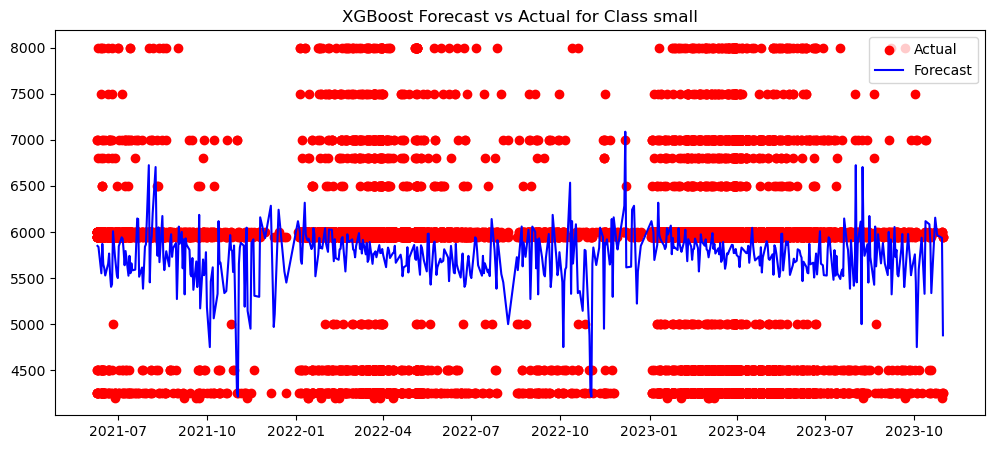

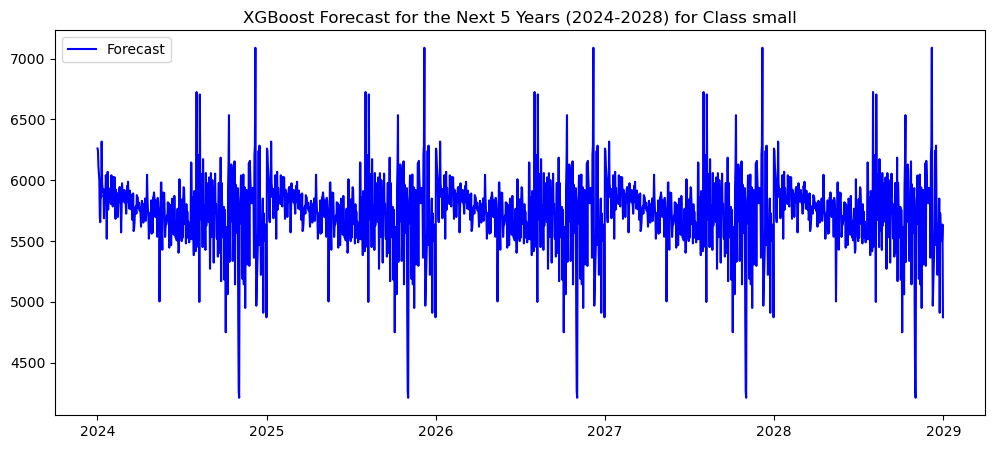

,DATE,year,month,day,Amount
1822,2028-12-27,2028,12,27,5545.916016
1823,2028-12-28,2028,12,28,5548.723145
1824,2028-12-29,2028,12,29,5498.462891
1825,2028-12-30,2028,12,30,5636.353516
1826,2028-12-31,2028,12,31,4873.358887


In [11]:
# Group the dataset by the "class" column
grouped = data.groupby("class")

# Iterate over each group and process the data
for class_name, class_data in grouped:
    process_class_data(class_data, class_name)
